In [1]:
  # Suprimir advertencias:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data_DT = pd.read_csv('PROFEPA_Datos_Con_Clusters.csv', delimiter=',')
data_DT.head()

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059),RelacionCintilla,Cluster
0,2015,1,20,0,1.443139e+09,1.474675e+09,0,2,2.0,0,0,20,1
1,2016,1,20,0,1.473379e+09,1.495930e+09,0,2,2.0,0,0,20,1
2,2017,1,10,0,1.504915e+09,1.527466e+09,0,2,2.0,0,0,10,1
3,2018,1,20,0,1.527466e+09,1.559002e+09,0,2,2.0,0,0,20,1
4,2019,1,0,0,1.559002e+09,1.590624e+09,0,2,2.0,0,0,0,1


# Pre procesamiento

In [4]:
data_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano               406 non-null    int64  
 1   Cespe             406 non-null    int64  
 2   Cintiauto         406 non-null    int64  
 3   Cintientrega      406 non-null    int64  
 4   Epocainicio       406 non-null    float64
 5   EpocaFin          406 non-null    float64
 6   Popularidad       406 non-null    int64  
 7   Riesgo (IUCN)     406 non-null    int64  
 8   UMAs              406 non-null    float64
 9   Caracter          406 non-null    int64  
 10  Riesgo (NOM-059)  406 non-null    int64  
 11  RelacionCintilla  406 non-null    int64  
 12  Cluster           406 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 41.4 KB


In [5]:
data_DT.describe()

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059),RelacionCintilla,Cluster
count,406.000000,406.000000,406.000000,406.000000,4.060000e+02,4.060000e+02,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,2018.874384,25.344828,435.866995,209.955665,1.530091e+09,1.563962e+09,0.679803,2.374384,8.206897,0.022167,0.347291,225.911330,0.933498
std,2.501651,14.262419,1182.669833,623.011617,7.512017e+07,7.737363e+07,0.837949,1.197831,9.320973,0.147410,0.863573,632.734502,0.249466
min,2015.000000,1.000000,0.000000,0.000000,1.395706e+09,1.425082e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,13.000000,0.250000,0.000000,1.473379e+09,1.495930e+09,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,2019.000000,25.500000,18.000000,4.000000,1.515715e+09,1.558915e+09,0.000000,2.000000,6.000000,0.000000,0.000000,10.500000,1.000000
75%,2021.000000,38.000000,111.500000,43.750000,1.602720e+09,1.622138e+09,1.000000,2.000000,8.000000,0.000000,0.000000,70.000000,1.000000
max,2023.000000,50.000000,5876.000000,3769.000000,1.673222e+09,1.701475e+09,2.000000,7.000000,44.000000,1.000000,4.000000,3599.000000,1.000000


Separar "X" y "y"

In [6]:
data_X = data_DT.drop(['Cintientrega', 'RelacionCintilla', 'Popularidad', 'Epocainicio', 'EpocaFin', 'Riesgo (IUCN)', 'Caracter'], axis=1)

In [7]:
data_X

,Ano,Cespe,Cintiauto,UMAs,Riesgo (NOM-059),Cluster
0,2015,1,20,2.0,0,1
1,2016,1,20,2.0,0,1
2,2017,1,10,2.0,0,1
3,2018,1,20,2.0,0,1
4,2019,1,0,2.0,0,1
...,...,...,...,...,...,...
401,2018,50,2,8.0,0,1
402,2019,50,2,8.0,0,1
403,2020,50,0,8.0,0,1
404,2021,50,0,8.0,0,1


In [8]:
X = data_X.values
X[0:5]

array([[2.015e+03, 1.000e+00, 2.000e+01, 2.000e+00, 0.000e+00, 1.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+01, 2.000e+00, 0.000e+00, 1.000e+00],
       [2.017e+03, 1.000e+00, 1.000e+01, 2.000e+00, 0.000e+00, 1.000e+00],
       [2.018e+03, 1.000e+00, 2.000e+01, 2.000e+00, 0.000e+00, 1.000e+00],
       [2.019e+03, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]])

In [9]:
y = data_DT['Popularidad'].values
y[0:5]

array([0, 0, 0, 0, 0])

# Generacion del modelo

In [10]:

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('Tamaño de X_Trainset: ', X_trainset.size)
print('Tamaño de y_Trainset: ', y_trainset.size)
print('---------------------------------------')
print('Tamaño de X_testset: ', X_testset.size)
print('Tamaño de y_testset: ', y_testset.size)

Tamaño de X_Trainset:  1704
Tamaño de y_Trainset:  284
---------------------------------------
Tamaño de X_testset:  732
Tamaño de y_testset:  122


# Importancia de caracteristicas

In [11]:
column_values = ['Ano','Cespe', 'Cintiauto', 'UMAs', 'Riesgo (NOM-059)', 'Cluster']

model = LogisticRegression()
model.fit(X_trainset, y_trainset)
importances = pd.DataFrame(data={
    'Attribute': column_values,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

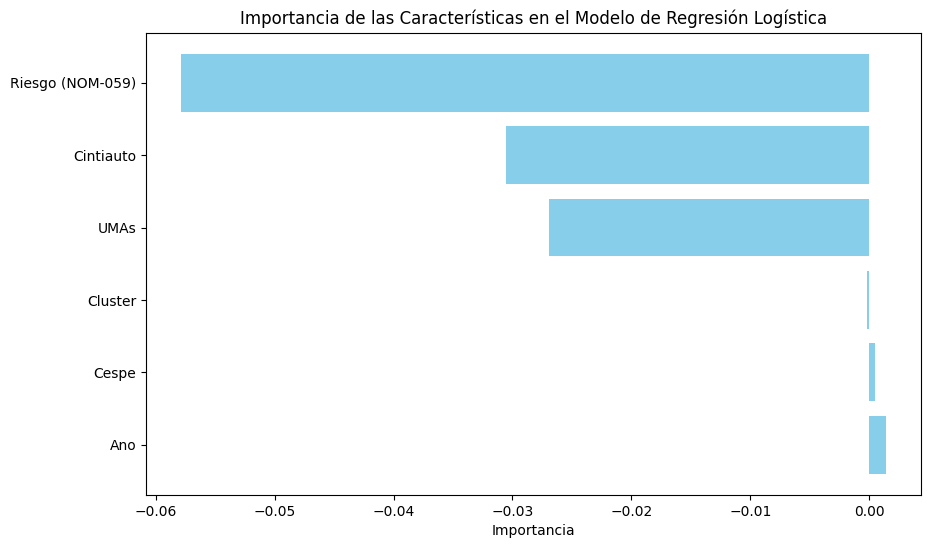

In [12]:
# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importances['Attribute'], importances['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo de Regresión Logística')
plt.show()

# Grid Search con Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cart_params = {"max_depth": range(3,10),
               "min_samples_split": list(range(2,50)),
               "min_samples_leaf": list(range(1,50))}
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_trainset, y_trainset)

Fitting 10 folds for each of 16464 candidates, totalling 164640 fits


In [ ]:
print('Mejores parámetros: ' + str(cart_cv_model.best_params_))

Mejores parámetros: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 9}


[0 0 0 2 0]
[0 0 0 2 0]
Score del modelo con el testset:  0.9180327868852459
Score del modelo con el trainset:  0.9401408450704225


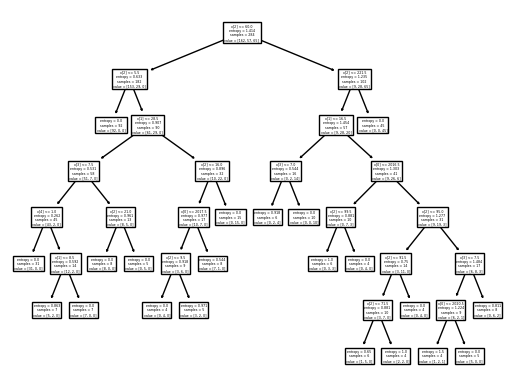

In [14]:
profundidad = 7
SNTree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 4, min_samples_split=9, max_depth = profundidad)
SNTree # it shows the default parameters
SNTree.fit(X_trainset,y_trainset)
predTree = SNTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
from sklearn import metrics
import matplotlib.pyplot as plt
predTree_Train = SNTree.predict(X_trainset)
print("Score del modelo con el testset: ", SNTree.score(X_testset, y_testset))
print("Score del modelo con el trainset: ", SNTree.score(X_trainset, y_trainset))
tree.plot_tree(SNTree)
plt.savefig('out.pdf')
plt.show()

In [15]:
# Imprime la Matriz de Confusión

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_testset, predTree)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[64  1  1]
 [ 4 17  2]
 [ 0  2 31]]


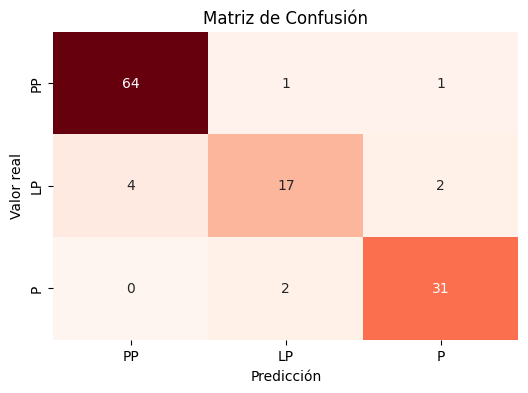

In [16]:
import seaborn as sns
conf_matrix = confusion_matrix(y_testset, predTree)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['PP', 'LP', 'P'],
            yticklabels=['PP', 'LP', 'P'],
            cbar = False)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

In [18]:
print(y_testset)

[0 0 0 2 0 1 0 2 1 0 1 0 2 2 0 2 1 1 1 2 0 0 1 2 2 0 0 1 1 2 1 0 2 0 0 0 0
 2 0 1 0 1 0 2 0 2 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 2 2 0 0 2 0 0 0 1 0 0 2 0
 1 1 0 1 0 2 1 0 0 0 0 1 0 2 0 2 0 2 2 0 0 0 0 2 2 0 2 0 2 0 2 1 2 2 0 0 0
 0 2 2 2 0 1 0 0 0 0 0]


In [19]:
print(predTree)

[0 0 0 2 0 1 0 2 1 0 1 0 2 2 0 2 0 1 0 2 0 0 1 2 2 0 0 0 1 2 1 0 2 0 0 0 0
 2 0 1 0 1 0 2 0 2 0 0 0 0 1 0 0 1 1 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 0 0 2 0
 1 2 0 1 0 2 1 0 0 0 0 1 0 2 0 2 0 2 2 0 0 0 0 2 1 0 2 0 2 0 2 0 2 1 0 0 0
 0 2 2 2 0 1 0 0 0 0 0]


In [20]:
data_graph = {'Valor Real': y_testset, 'Predicción': predTree}
df_Evaluacion = pd.DataFrame(data_graph)

In [27]:
df_Evaluacion

,Valor Real,Predicción
0,0,0
1,0,0
2,0,0
3,2,2
4,0,0
...,...,...
117,0,0
118,0,0
119,0,0
120,0,0


from matplotlib import pyplot as plt
df_Evaluacion['Valor Real'].plot(kind='hist', bins=20, title='Valor Real')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_Evaluacion['Predicción'].plot(kind='hist', bins=20, title='Predicción')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_Evaluacion.plot(kind='scatter', x='Valor Real', y='Predicción', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_Evaluacion['Valor Real'].plot(kind='line', figsize=(8, 4), title='Valor Real')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_Evaluacion['Predicción'].plot(kind='line', figsize=(8, 4), title='Predicción')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
path = 'Comparacion_Entrenamiento_Prediccion.xlsx'

In [26]:
df_Evaluacion.to_excel(path, index = False)

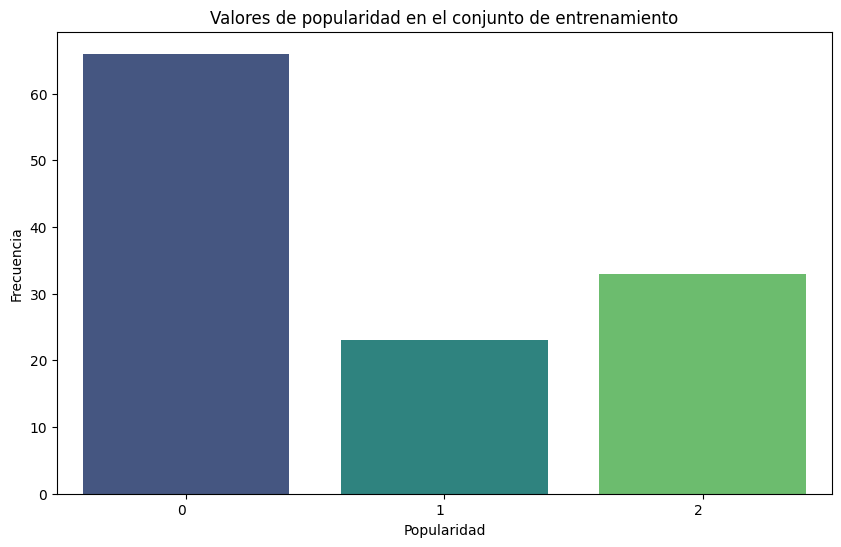

In [30]:
VReal_counts = df_Evaluacion['Valor Real'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=VReal_counts.index, y=VReal_counts.values, palette='viridis')
plt.title('Valores de popularidad en el conjunto de entrenamiento')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0, ha='right')
plt.show()

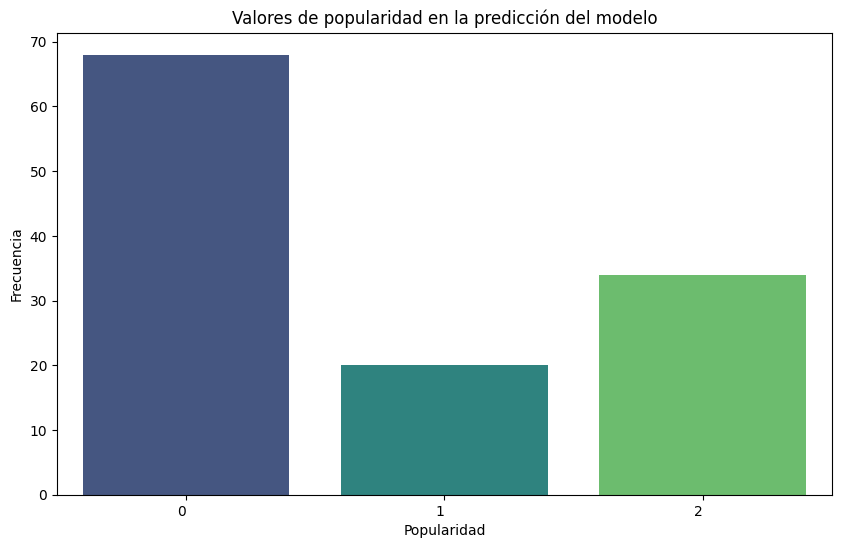

In [33]:
VPred_counts = df_Evaluacion['Predicción'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=VPred_counts.index, y=VPred_counts.values, palette='viridis')
plt.title('Valores de popularidad en la predicción del modelo')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0, ha='right')
plt.show()

In [34]:
df_Evaluacion['Evaluación'] = np.where(df_Evaluacion['Valor Real'] == df_Evaluacion['Predicción'], 1, 0)

In [35]:
df_Evaluacion

,Valor Real,Predicción,Evaluación
0,0,0,1
1,0,0,1
2,0,0,1
3,2,2,1
4,0,0,1
...,...,...,...
117,0,0,1
118,0,0,1
119,0,0,1
120,0,0,1


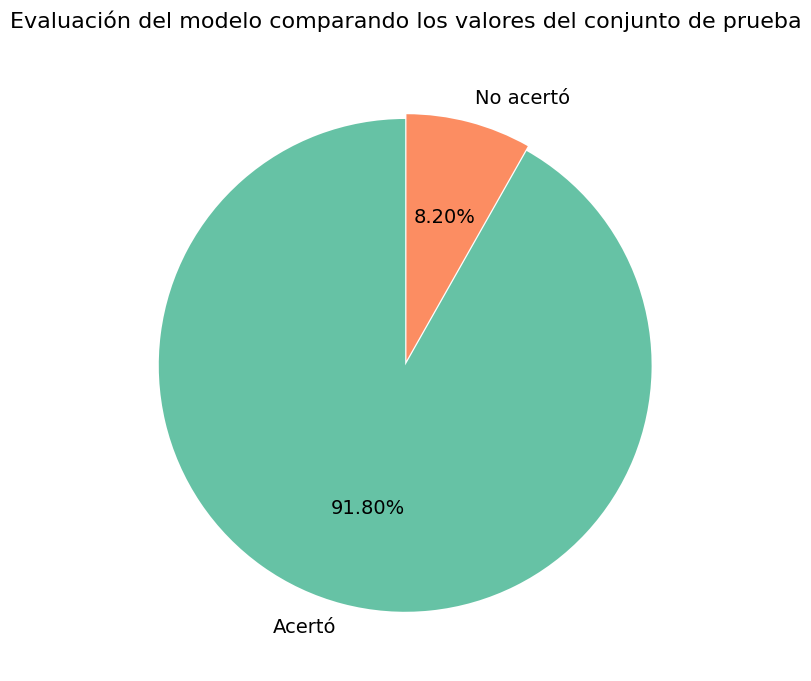

In [37]:
myexplode2 = [0.01, 0.01]
plt.figure(figsize=(8,8))

plt.pie(
    x=df_Evaluacion['Evaluación'].value_counts(),
    labels=['Acertó', 'No acertó'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    # increase the size of all text elements
    textprops={'fontsize':14},
    colors=sns.color_palette('Set2'),
    startangle = 90,
    explode = myexplode2
)

# Add Title
plt.title(
    label="Evaluación del modelo comparando los valores del conjunto de prueba",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()

In [17]:
from sklearn.metrics import classification_report
print('Reporte generado para el modelo de árboles de decisión')
print('con una profundidad =', profundidad)
print(classification_report(y_testset, predTree))

Reporte generado para el modelo de árboles de decisión
con una profundidad = 7
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.85      0.74      0.79        23
           2       0.91      0.94      0.93        33

    accuracy                           0.92       122
   macro avg       0.90      0.88      0.89       122
weighted avg       0.92      0.92      0.92       122

